### 📖Data analysis with xarray

This lesson is about how to use xarray to analyze data. It covers the following topics:

- Data access through indexing
- analysis tools
- Illustrations
- Complete examples

Let's start by importing the necessary libraries:

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import requests
import cartopy.crs as ccrs

We will start learning by working on an example. We will use the HadISST1 data set, which is a gridded data set of globally distributed sea surface temperature and sea ice concentration data. We will use xarray to analyze this data set and answer the following questions:

- What is the global maximum and minimum sea surface temperature for 2019?

- Show the annual sea surface temperature line for a geoposition that is close to Hawaii (USA). What was the average sea surface temperature there for 2019?

### 📖Data access
In *xarray*, access is via a mixture of *labels* and ordinary indexing, as already known from *NumPy* or *Pandas*. 

Direct access to individual data:

In [2]:
url = "https://git.rwth-aachen.de/nfdi4earth/edutrain/content/extern/fundamentals-of-big-spatial-data/-/raw/main/Data/HadISST1_SST_update.nc?ref_type=heads&inline=false"

# Download the file
response = requests.get(url)
with open("HadISST1_SST_update.nc", "wb") as f:
    f.write(response.content)

data = xr.open_dataset('HadISST1_SST_update.nc')
data

<xarray.Dataset>
Dimensions:    (time: 9, nv: 2, latitude: 180, longitude: 360)
Coordinates:
  * time       (time) datetime64[ns] 2019-01-16T12:00:00 ... 2019-09-16T12:00:00
  * latitude   (latitude) float32 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
Dimensions without coordinates: nv
Data variables:
    time_bnds  (time, nv) float32 ...
    sst        (time, latitude, longitude) float32 ...
Attributes:
    Title:                      Monthly version of HadISST sea surface temper...
    description:                HadISST 1.1 monthly average sea surface tempe...
    institution:                Met Office Hadley Centre
    source:                     HadISST
    reference:                  Rayner, N. A., Parker, D. E., Horton, E. B., ...
    Conventions:                CF-1.0
    history:                    8/11/2019 converted to netcdf from pp format
    supplementary_information:  Updates and supplementary information will be...
    comment:                    Data restrictions: for academic research use ...

In [3]:
data['sst'][:, ::10, ::10] # every 10th point in each direction

<xarray.DataArray 'sst' (time: 9, latitude: 18, longitude: 36)>
[5832 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2019-01-16T12:00:00 ... 2019-09-16T12:00:00
  * latitude   (latitude) float32 89.5 79.5 69.5 59.5 ... -60.5 -70.5 -80.5
  * longitude  (longitude) float32 -179.5 -169.5 -159.5 ... 150.5 160.5 170.5
Attributes:
    standard_name:  sea_surface_temperature
    long_name:      sst
    units:          C
    cell_methods:   time: lat: lon: mean

Access via data items:

In [4]:
tmp = data.isel(time=8, latitude=5, longitude=3) # 9th time, 6th latitude, 4th longitude
tmp

<xarray.Dataset>
Dimensions:    (nv: 2)
Coordinates:
    time       datetime64[ns] 2019-09-16T12:00:00
    latitude   float32 84.5
    longitude  float32 -176.5
Dimensions without coordinates: nv
Data variables:
    time_bnds  (nv) float32 ...
    sst        float32 ...
Attributes:
    Title:                      Monthly version of HadISST sea surface temper...
    description:                HadISST 1.1 monthly average sea surface tempe...
    institution:                Met Office Hadley Centre
    source:                     HadISST
    reference:                  Rayner, N. A., Parker, D. E., Horton, E. B., ...
    Conventions:                CF-1.0
    history:                    8/11/2019 converted to netcdf from pp format
    supplementary_information:  Updates and supplementary information will be...
    comment:                    Data restrictions: for academic research use ...

Access via data values:

In [5]:
data.sel(longitude=-179.5, latitude=45.5) # nearest point to 45.5N, 179.5W

<xarray.Dataset>
Dimensions:    (time: 9, nv: 2)
Coordinates:
  * time       (time) datetime64[ns] 2019-01-16T12:00:00 ... 2019-09-16T12:00:00
    latitude   float32 45.5
    longitude  float32 -179.5
Dimensions without coordinates: nv
Data variables:
    time_bnds  (time, nv) float32 ...
    sst        (time) float32 ...
Attributes:
    Title:                      Monthly version of HadISST sea surface temper...
    description:                HadISST 1.1 monthly average sea surface tempe...
    institution:                Met Office Hadley Centre
    source:                     HadISST
    reference:                  Rayner, N. A., Parker, D. E., Horton, E. B., ...
    Conventions:                CF-1.0
    history:                    8/11/2019 converted to netcdf from pp format
    supplementary_information:  Updates and supplementary information will be...
    comment:                    Data restrictions: for academic research use ...

Access via data conditions, for example, replace all values that are below -100 °C:

In [6]:
data = data.where(data.sst >= -100, other=np.nan)
data.sst.values

array([[[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ..., -1.8, -1.8,  nan],
        ...,
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       [[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ...,
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       [[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ...,
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       ...,

       [[-1.8, -1.8, -1.

Conversion of data to `NumPy` arrays:

In [7]:
data.sel(longitude=-179.5, latitude=45.5).sst.values

array([ 6.159567 ,  5.5957103,  5.281234 ,  5.521528 ,  6.477437 ,
        8.29946  , 11.015162 , 13.948002 , 13.403329 ], dtype=float32)

### 📖Analysis tools

There are many built-in tools for calculating statistical values. For example, here we calculate the average value over time (the year 2019):

In [8]:
data.mean('time')

<xarray.Dataset>
Dimensions:    (nv: 2, latitude: 180, longitude: 360)
Coordinates:
  * latitude   (latitude) float32 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
Dimensions without coordinates: nv
Data variables:
    time_bnds  (nv, latitude, longitude) float32 5.461e+04 5.461e+04 ... nan nan
    sst        (latitude, longitude) float32 -1.8 -1.8 -1.8 -1.8 ... nan nan nan

Or just for a geoposition averaged over time:

In [9]:
data.sel(latitude=48.5, longitude=-8.5).mean('time').sst

<xarray.DataArray 'sst' ()>
array(14.473166, dtype=float32)
Coordinates:
    latitude   float32 48.5
    longitude  float32 -8.5

Especially also as a moving average over 3 months:

In [10]:
data.sel(latitude=48.5, longitude=-8.5).rolling(time=3).mean()

<xarray.Dataset>
Dimensions:    (time: 9, nv: 2)
Coordinates:
  * time       (time) datetime64[ns] 2019-01-16T12:00:00 ... 2019-09-16T12:00:00
    latitude   float32 48.5
    longitude  float32 -8.5
Dimensions without coordinates: nv
Data variables:
    time_bnds  (time, nv) float32 nan nan nan ... 5.463e+04 5.463e+04 5.466e+04
    sst        (time) float32 nan nan 11.83 11.7 12.3 13.54 15.67 17.3 18.06
Attributes:
    Title:                      Monthly version of HadISST sea surface temper...
    description:                HadISST 1.1 monthly average sea surface tempe...
    institution:                Met Office Hadley Centre
    source:                     HadISST
    reference:                  Rayner, N. A., Parker, D. E., Horton, E. B., ...
    Conventions:                CF-1.0
    history:                    8/11/2019 converted to netcdf from pp format
    supplementary_information:  Updates and supplementary information will be...
    comment:                    Data restrictions: for academic research use ...

### 📖Figures in xarrey

Many figure types can be accessed directly from `xarray`:

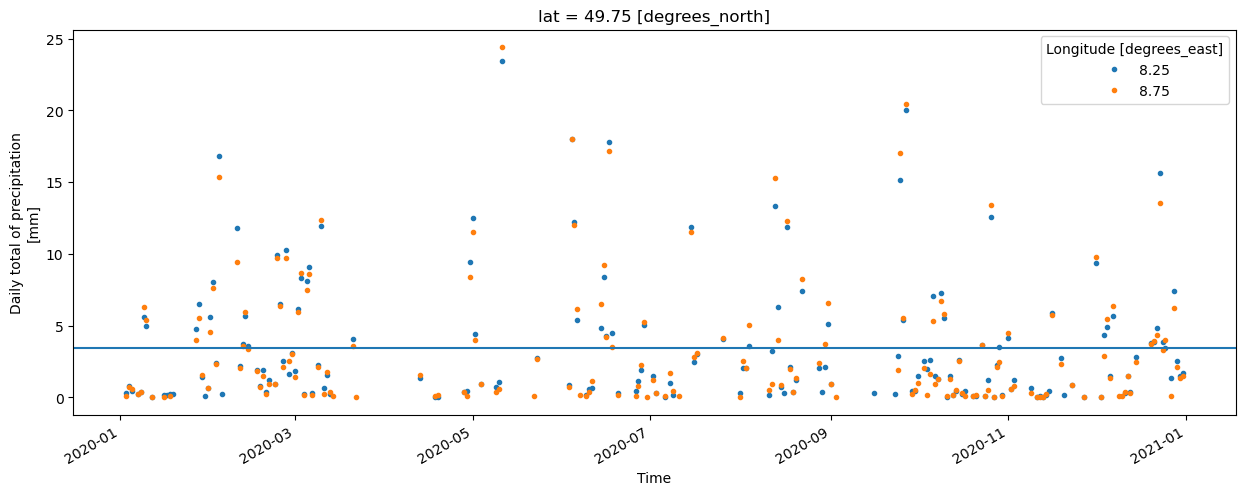

In [12]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,5))
ax = plt.axes()

# load percipitation data
url = "https://git.rwth-aachen.de/nfdi4earth/edutrain/content/extern/fundamentals-of-big-spatial-data/-/raw/main/Data/precip.2020.nc?ref_type=heads&inline=false"

# Download the file
response = requests.get(url)
with open('precip.2020.nc', "wb") as f:
    f.write(response.content)
rain = xr.open_dataset('precip.2020.nc').precip

# Alle Werte mit 0 löschen
rain = rain.where(rain > 0, other=np.nan)

# Niederschlag für das Pixel von Karlsruhe abbilden
p = rain.sel(lat=49.75, lon=[8.25, 8.75]).plot.line(ax=ax, x='time', marker='.', ls='none')

# Was ist der Durchschnitt?
ax.axhline(rain.sel(lat=49.75, lon=8.25).mean('time').values)

plt.show()

This example nicely shows the rasterization of the data (the white dot is Karlsruhe):

In [ ]:
#import cartopy.crs as ccrs
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,5))
ax = plt.axes(projection=ccrs.PlateCarree(), facecolor='gray')

rain = xr.open_dataset('precip.2020.nc').precip

p = rain.mean('time').plot(ax=ax, transform=ccrs.PlateCarree(), cmap='jet')

p.axes.set_extent([6, 11, 47, 51])
ax.plot(8.4037, 49.0069, transform=ccrs.Geodetic(), marker='o', c='w')

plt.show()

In the following, we will show two complete examples of data mapping. One powerful example of data mapping is creating a world map of sea surface temperature difference for 2019 (data from [Met Office UK](https://www.metoffice.gov.uk/hadobs/hadisst/data/download.html)):

In [ ]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,5))
ax = plt.axes(projection=ccrs.PlateCarree(), facecolor='gray')

# Daten öffnen ...
sst = xr.open_dataset('data/HadISST_2019.nc').sst
# fehlende Werte ersetzen
sst = sst.where(sst > -1000, other=np.nan)
sst = sst.where(sst < 1000, other=np.nan)

# Jahreszeitendifferenz (Juli und Januar)
diff_sst = sst.isel(time=6) - sst.isel(time=0)

# Abbildung erzeugen
p = diff_sst.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='seismic')
p.axes.coastlines(color='w')

plt.show()

 An other compelling example is creating a world map of average annual precipitation, which provides a global overview of average annual precipitation (data from [NOAA](https://psl.noaa.gov/data/gridded/data.cpc.globalprecip.html)):

In [ ]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,5))
ax = plt.axes(projection=ccrs.PlateCarree(), facecolor='gray')

rain = xr.open_dataset('data/precip.2020.nc').precip

p = rain.mean('time').plot(ax=ax, transform=ccrs.PlateCarree(), cmap='jet')

p.axes.set_global()

p.axes.coastlines(color='w')

plt.show()


**🧠 Dive Deeper:** For further functionality please study the [*xarray* manual](https://xarray.pydata.org/).

### ✏️Task 1

These questions are all based on the 2019 sea surface temperature data set (file: *data/HadISST1_SST_update.nc*).

- What is the global maximum and minimum sea surface temperature for 2019?

- Show the annual sea surface temperature line for a geoposition that is close to Hawaii (USA). What was the average sea surface temperature there for 2019?


### ✏️Task 2

This exercise uses a soil moisture dataset [dataset ESSMRA](https://cds.climate.copernicus.eu/cdsapp#!/dataset/satellite-soil-moisture?tab=form). For 2013, the files are stored in a subfolder (e.g., *data/SSMT/SSMT_yyymmdd.nc*).


- Map the global difference in soil moisture between April and October 2013.

- Calculate the average over all values in longitude and map this average over latitude for both months.

- Merge the data from all 12 months of 2013, and save this as one file.